<a href="https://colab.research.google.com/github/raffaelepojer/DeepLearningAssignment/blob/DL_luna/luna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Accessing the dataset

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

%cd /content/gdrive/MyDrive/dataset_elisa

Mounted at /content/gdrive
/content/gdrive/MyDrive/dataset_elisa


# Start importing the dataset in pytorch

In [ ]:
import torch, torchvision
from torch.utils.data import Dataset
from torchvision import transforms as T 
import torch.nn.functional as F 
#from torchvision import datasets
#from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd

import os
import shutil
from torchvision.io import read_image
from torch.utils.data import DataLoader

# Shrinking the dataset

In [ ]:
# CHECK FOR MISSING DATA

df_red = pd.read_csv('annotations_train.csv') 
df_red.info(verbose = True)

In [ ]:
#os.mkdir('/content/gdrive/MyDrive/dataset_elisa_red')
#os.mkdir('/content/gdrive/MyDrive/dataset_elisa_red/train')
#os.mkdir('/content/gdrive/MyDrive/dataset_elisa_red/test')

In [ ]:
sorted_csv = r'/content/gdrive/MyDrive/dataset_elisa_red/tmp.csv'
final = r'/content/gdrive/MyDrive/dataset_elisa_red/annotations_train_sorted_red.csv'
db = pd.read_csv('/content/gdrive/MyDrive/dataset_elisa/annotations_train.csv', header = 0)
db.sort_values(by=['id'], ascending=True).to_csv(sorted_csv, index=False)
red_csv_sorted = pd.read_csv(sorted_csv, nrows = 100)
red_csv_sorted.to_csv(final, sep = ',')
#red_csv_sorted

In [ ]:
# REDUCED TRAIN DIRECTORY
os.chdir('/content/gdrive/MyDrive/dataset_elisa/train')
dst_dir = '/content/gdrive/MyDrive/dataset_elisa_red/train'

for idx in red_csv_sorted['id']:
  for f in os.listdir(): 
    if str(idx).zfill(4) == f[:4]:      
      shutil.copy(f, dst_dir)

In [ ]:
# REDUCED TEST DIRECTORY
red_csv_sorted = pd.read_csv(sorted_csv, nrows = 20)
os.chdir('/content/gdrive/MyDrive/dataset_elisa/test')
dst_dir = '/content/gdrive/MyDrive/dataset_elisa_red/test'

for idx in red_csv_sorted['id']:
  for f in os.listdir(): 
    if str(idx).zfill(6) == f[:6]:
      shutil.copy(f, dst_dir)

# Preliminary checks

In [ ]:
df = pd.read_csv('annotations_train.csv')
tmp = df.iloc[df.index[df['id'] == 9], 1:]
tmp

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# Age and gender
df['age'].value_counts().plot(ax=axes[0,0], kind = 'bar', title = 'Age')
df['gender'].value_counts().plot(ax=axes[0,1], kind = 'bar', title = 'Gender')
# Head features
df['hair'].value_counts().plot(ax=axes[1,0], kind = 'bar', title = 'Hair')
df['hat'].value_counts().plot(ax=axes[1,1], kind = 'bar', title = 'Hat')


In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# General features
df['backpack'].value_counts().plot(ax=axes[0,0], kind = 'bar', title = 'Backpack')
df['bag'].value_counts().plot(ax=axes[0,1], kind = 'bar', title = 'Bag')
df['handbag'].value_counts().plot(ax=axes[1,0], kind = 'bar', title = 'Handbag')
df['clothes'].value_counts().plot(ax=axes[1,1], kind = 'bar', title = 'Clothes')

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# Upper clothing color
df['upblack'].value_counts().plot(ax=axes[0,0], kind = 'bar', title = 'Upblack')
df['upwhite'].value_counts().plot(ax=axes[0,1], kind = 'bar', title = 'Upwhite')
df['upred'].value_counts().plot(ax=axes[1,0], kind = 'bar', title = 'Upred')
df['uppurple'].value_counts().plot(ax=axes[1,1], kind = 'bar', title = 'Uppurple')

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# Cntd
df['upyellow'].value_counts().plot(ax=axes[0,0], kind = 'bar', title = 'Upyellow')
df['upgray'].value_counts().plot(ax=axes[0,1], kind = 'bar', title = 'Upgray')
df['upblue'].value_counts().plot(ax=axes[1,0], kind = 'bar', title = 'Upblue')
df['upgreen'].value_counts().plot(ax=axes[1,1], kind = 'bar', title = 'Upgreen')

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# Lower clothing color
df['downblack'].value_counts().plot(ax=axes[0,0], kind = 'bar', title = 'Downblack')
df['downwhite'].value_counts().plot(ax=axes[0,1], kind = 'bar', title = 'Downwhite')
df['downpink'].value_counts().plot(ax=axes[1,0], kind = 'bar', title = 'Downpink')
df['downpurple'].value_counts().plot(ax=axes[1,1], kind = 'bar', title = 'Downpurple')

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2)
# Cntd
df['downyellow'].value_counts().plot(ax=axes[0,0], kind = 'bar', title = 'Downyellow')
df['downgray'].value_counts().plot(ax=axes[0,1], kind = 'bar', title = 'Downgray')
df['downblue'].value_counts().plot(ax=axes[1,0], kind = 'bar', title = 'Downblue')
df['downgreen'].value_counts().plot(ax=axes[1,1], kind = 'bar', title = 'Downgreen')
df['downbrown'].value_counts().plot(ax=axes[2,0], kind = 'bar', title = 'Downbrown')

In [ ]:
class ElyImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir

        self.imgs = os.listdir(img_dir)
        self.img_list = self.imgs

        self.imgs = [el for el in self.imgs if os.path.splitext(el)[1] == '.jpg']
        self.lb_ids = [int(el.split('_')[0]) for el in self.imgs]
        self.lb_cams = [int(el.split('_')[1][1]) for el in self.imgs]
        self.imgs = [os.path.join(img_dir, el) for el in self.imgs]

        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_list[idx])
        image = read_image(img_path)
        id = self.lb_ids[idx]

        label = torch.tensor(self.img_labels.iloc[self.img_labels.index[self.img_labels['id'] == self.lb_ids[idx]], 1:].values)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, id, label


In [ ]:
training_data = ElyImageDataset('/content/gdrive/MyDrive/dataset_elisa_red/annotations_train_sorted_red.csv', '/content/gdrive/MyDrive/dataset_elisa_red/train/')

# Show 4 samples in the dataset

0 torch.Size([3, 128, 64]) 350
1 torch.Size([3, 128, 64]) 1411
2 torch.Size([3, 128, 64]) 959
3 torch.Size([3, 128, 64]) 959


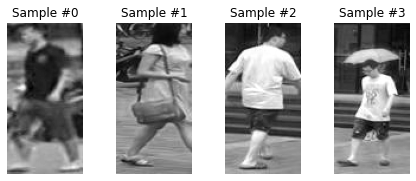

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

for i in range(len(training_data)):
    image, id, label = training_data[i]

    print(i, image.shape, id)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')

    plt.imshow(image[0], cmap='gray')

    if i == 3:
        plt.show()
        break

In [ ]:
labels_map = {
    0: {
        1: 'young',
        2: 'teenager',
        3: 'adult',
        4: 'old'
    },
    1: {
        1: 'no backpack',
        2: 'yes backpack'
    },
    2: {
        1: 'no bag',
        2: 'yes bag'
    },
    3: {
        1: 'no handbag',
        2: 'yes handbag'
    },
    4: {
        1: 'dress',
        2: 'pants'
    },
    5: {
        1: 'long lower body clothing',
        2: 'short'
    },
    6: {
        1: 'long sleeve',
        2: 'short sleeve'
    },
    7: {
        1: 'short hair',
        2: 'long hair'
    },
    8: {
        1: 'no hat',
        2: 'yes hat'
    },
    9: {
        1: 'male',
        2: 'female'
    },
    10: {
        1: 'no upblack',
        2: 'yes upblack'
    },
    11: {
        1: 'no upwhite',
        2: 'yes upwhite'
    },
    12: {
        1: 'no upred',
        2: 'yes upred'
    },
    13: {
        1: 'no uppurple',
        2: 'yes uppurple'
    },
    14: {
        1: 'no upyellow',
        2: 'yes upyellow'
    },
    15: {
        1: 'no upgray',
        2: 'yes upgray'
    },
    16: {
        1: 'no upblue',
        2: 'yes upblue'
    },
    17: {
        1: 'no upgreen',
        2: 'yes upgreen'
    },
    18: {
        1: 'no downblack',
        2: 'yes downblack'
    },
    19: {
        1: 'no downwhite',
        2: 'yes downwhite'
    },
    20: {
        1: 'no downpink',
        2: 'yes downpink'
    },
    21: {
        1: 'no downpurple',
        2: 'yes downpurple'
    },
    22: {
        1: 'no downyellow',
        2: 'yes downyellow'
    },
    23: {
        1: 'no downgray',
        2: 'yes downgray'
    },
    24: {
        1: 'no downblue',
        2: 'yes downblue'
    },
    25: {
        1: 'no downgreen',
        2: 'yes downgreen'
    },
    26: {
        1: 'no downbrown',
        2: 'yes downbrown'
    }    
}

# what about multicolor?

Feature batch shape: torch.Size([64, 3, 128, 64])
Labels batch shape: torch.Size([64, 1, 27])


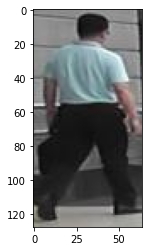

adult
no backpack
no bag
yes handbag
pants
long lower body clothing
short sleeve
short hair
no hat
male
no upblack
yes upwhite
no upred
no uppurple
no upyellow
no upgray
no upblue
no upgreen
yes downblack
no downwhite
no downpink
no downpurple
no downyellow
no downgray
no downblue
no downgreen
no downbrown
Label: tensor([3, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 1, 1])


In [ ]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

train_features, train_ids, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0]
label = train_labels[0].squeeze()
plt.imshow(img.permute(1, 2, 0))
plt.show()

for i in range(len(label)):
  print(labels_map[i][label[i].item()])

print(f"Label: {label}")

# First random attempt

## Loss/cost function

In [ ]:
def get_cost_function():
  cost_function = torch.nn.CrossEntropyLoss()
  return cost_function

## Optimizer

In [ ]:
def get_optimizer(net, lr, wd, momentum):
  optimizer = torch.optim.SGD(net.parameters(), lr = lr, 
                              weight_decay = wd, momentum = momentum)
  return optimizer

## Train function

In [ ]:
def train(net, data_loader, optimizer, cost_function, device = 'cuda'):
  samples = 0.
  cumulative_loss = 0.
  cumulative_accuracy = 0.

  net.train()
  for batch_idx, (inputs, targets) in enumerate(data_loader):

    inputs = inputs.to(device)
    targets = targets.to(device)

    # Forward pass
    ouputs = net(inputs)

    # Apply the loss
    loss = cost_function(outputs, targets)

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()

    # Reset the gradients
    optimizer.zero_grad()

    samples += inputs.shape[0]
    cumulative_loss += loss.item()
    _, predicted = outputs.max(dim = 1)

    cumulative_accuracy += predicted.eq(targets).sum().item()

  return cumulative_loss/samples, cumulative_accuracy/samples*100

## Wrapping everything up

In [ ]:
def log_values(writer, step, loss, accuracy, prefix):
  writer.add_scalar(f'{prefix}/loss', loss, step)
  writer.add_scalar(f'{prefix}/accuracy', accuracy, step)

def main(batch_size = 128, input_dim = 28*28, hidden_dim = 100, output_dim = 10, device = 'cuda:0', learning_rate = 0.01, weight_decay = 0.000001, momentum = 0.9, epochs = 10):
  from torch.utils.tensorboard import SummaryWriter
  # Creates a logger for the experiment
  writer = SummaryWriter(log_dir = 'runs/exp1')

  # Gets DataLoaders
  train_loader, val_loader, test_loader = get_data(batch_size)

  # Instantiates the network and moves it to the chosen device (GPU)
  net = MyFirstNetwork(input_dim, hidden_dim, output_dim).to(device)

  # Instantiates the optimizer
  optimizer = get_optimizer(net, learning_rate, weight_decay, momentum)

  # Creates the cost function
  cost_function = get_cost_function()

  # Computes evaluation results before training
  print('Before training:')
  train_loss, train_accuracy = test(net, train_loader, cost_function)
  val_loss, val_accuracy = test(net, val_loader, cost_function)
  test_loss, test_accuracy = test(net, test_loader, cost_function)

  # Logs to TensorBoard
  log_values(writer, -1, train_loss, train_accuracy, 'Train')
  log_values(writer, -1, val_loss, val_accuracy, 'Validation')
  log_values(writer, -1, test_loss, test_accuracy, 'Test')

  print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
  print('\t Validation loss {:.5f}, Validation accuracy {:.2f}'.format(val_loss, val_accuracy))
  print('\t Test loss {:.5f}, Test accuracy {:.2f}'.format(test_loss, test_accuracy))
  print('----------------------------------------------------------------------------')

  # For each epoch, train the network and then compute evaluation results
  for e in range(epochs):
    train_loss, train_accuracy = train(net, train_loader, optimizer, cost_function)
    val_loss, val_accuracy = test(net, val_loader, cost_function)

    # Logs to TensorBoard
    log_values(writer, e, val_loss, val_accuracy, 'Validation')

    print('Epoch: {:d}'.format(e+1))
    print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
    print('\t Validation loss {:.5f}, Validation accuracy {:.2f}'.format(val_loss, val_accuracy))
    print('-----------------------------------------------------')

  # Compute final evaluation results
  print('After training')
  train_loss, train_accuracy = test(net, train_loader, cost_function)
  val_loss, val_accuracy = test(net, val_loader, cost_function)
  test_loss, test_accuracy = test(net, test_loader, cost_function)

  # Logs to TensorBoard
  log_values(writer, epochs, train_loss, train_accuracy, 'Train')
  log_values(writer, epochs, val_loss, val_accuracy, 'Validation')
  log_values(writer, epochs, test_loss, test_accuracy, 'Test')

  print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
  print('\t Validation loss {:.5f}, Validation accuracy {:.2f}'.format(val_loss, val_accuracy))
  print('\t Test loss {:.5f}, Test accuracy {:.2f}'.format(test_loss, test_accuracy))
  print('-----------------------------------------------------')

  # Closes the logger 
  writer.close()



In [ ]:
main()

# Trying AlexNet

In [ ]:
# import necessary libraries
import torch
import torchvision
import torch.nn.functional as F
import torchvision.transforms as T

# Library needed for visualization purposes
from torch.utils.tensorboard import SummaryWriter

## Define the function that fetches a data loader that is then used during iterative training

In [ ]:
# '''
# Input arguments:
#   batch_size: mini batch size used during training
#   img_root: path to the dataset parent folder. 
#             The folder just above the sub-folders or class folders
# '''

# def get_data(batch_size, img_root, train_loc, test_loc, ann_loc):
  
#   # Prepare data transformations for the train loader
#   # transform = list()
#   # transform.append(T.Resize((64, 128)))                      # Resize each PIL image to 256 x 256
#   # transform.append(T.RandomCrop((50, 100)))                   # Randomly crop a 224 x 224 patch
#   # transform.append(T.ToTensor())                              # converts Numpy to Pytorch Tensor
#   # transform.append(T.Normalize(mean=[0.485, 0.456, 0.406], 
#   #                              std=[0.229, 0.224, 0.225]))    # Normalize with ImageNet mean
#   # transform = T.Compose(transform)                            # Composes the above transformations into one.

#   train_transforms = T.Compose([T.Resize((64, 128)),
#                                          T.RandomCrop((50, 100)),
#                                          T.ToTensor(),
#                                          T.Normalize(mean=[0.485, 0.456, 0.406],
#                                                               std=[0.229, 0.224, 0.225]) 
#                                        ])

#   test_transforms = T.Compose([T.Resize((64, 128)),
#                                         T.ToTensor(),
#                                         T.Normalize(mean=[0.485, 0.456, 0.406],
#                                                              std=[0.229, 0.224, 0.225])
#                                       ])

#   # Load data
#   elisa_train = torchvision.datasets.ImageFolder(root=train_loc, transform=train_transforms)
#   elisa_test = torchvision.datasets.ImageFolder(root=test_loc, transform=test_transforms)
  
#   # Create train and test splits
#   # We will create a 80:20 % train:test split
#   # num_samples = len(elisa_dataset)
#   # training_samples = int(num_samples * 0.8 + 1)
#   # test_samples = num_samples - training_samples

#   # training_data, test_data = torch.utils.data.random_split(elisa_dataset, 
#   #                                                          [training_samples, test_samples])

#   # Initialize dataloaders
#   train_loader = torch.utils.data.DataLoader(elisa_train, batch_size, shuffle=True)
#   test_loader = torch.utils.data.DataLoader(elisa_test, batch_size, shuffle=False)
  
#   return train_loader, test_loader

# trainloader, testloader = get_data(128, '/content/gdrive/MyDrive/dataset_elisa', 
#                                    '/content/gdrive/MyDrive/dataset_elisa/train', 
#                                    '/content/gdrive/MyDrive/dataset_elisa/test', 
#                                    '/content/gdrive/MyDrive/dataset_elisa/attribute')
# print(trainloader.dataset.classes)


In [ ]:
import numpy as np

df = pd.read_csv('/content/gdrive/MyDrive/dataset_elisa/attribute/annotations_train.csv')
tmp = df.iloc[df.index[df['id'] == 474], 1:]

# print(tmp)
# print(df.columns.get_loc('upblack'))
# print(df.columns.get_loc('upgreen'))

#add the two new categories to the dataset labels

df = df.assign(upmulticolor=pd.Series(np.ones(len(df.index), dtype=int)))
df = df.assign(downmulticolor=pd.Series(np.ones(len(df.index), dtype=int)))

for x in range(len(df.index)):
  a = True
  for y in range(df.columns.get_loc('upblack'), df.columns.get_loc('upgreen')+1):
    if df.iloc[x, y] == 2:
      a = False
  if a:
    df.at[x, 'upmulticolor'] = 2
  
  a = True
  for y in range(df.columns.get_loc('downblack'), df.columns.get_loc('downbrown')+1):
    if df.iloc[x, y] == 2:
      a = False
  if a:
    df.at[x, 'downmulticolor'] = 2

# save the new dataset

df.to_csv('/content/gdrive/MyDrive/dataset_elisa/attribute/annotations_train_new.csv', index=False)


# print to check the upmulticolor 

# for x in range(len(df.index)):
#  if df.at[x, 'upmulticolor'] == 2:
#    print(df.iloc[x, 11:])

In [ ]:
class ElyImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir

        self.imgs = os.listdir(img_dir)
        self.img_list = self.imgs

        self.imgs = [el for el in self.imgs if os.path.splitext(el)[1] == '.jpg']
        self.lb_ids = [int(el.split('_')[0]) for el in self.imgs]
        self.lb_cams = [int(el.split('_')[1][1]) for el in self.imgs]
        self.imgs = [os.path.join(img_dir, el) for el in self.imgs]

        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_list[idx])
        image = read_image(img_path)
        id = self.lb_ids[idx]

        label = torch.tensor(self.img_labels.iloc[self.img_labels.index[self.img_labels['id'] == self.lb_ids[idx]], 1:].values)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, id, label



In [ ]:
training_data = ElyImageDataset('/content/gdrive/MyDrive/dataset_elisa/attribute/annotations_train_new.csv', '/content/gdrive/MyDrive/dataset_elisa/train/')   
#test_data = ElyImageDataset('/content/gdrive/MyDrive/dataset_elisa/attribute/annotations_train_new.csv', '/content/gdrive/MyDrive/dataset_elisa/test/')     
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
#test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

## Define AlexNet model

In [ ]:
'''
Input arguments
  num_classes: number of classes in the dataset.  Here 27
               This is equal to the number of output neurons.
'''

def initialize_alexnet(num_classes):
  # load the pre-trained Alexnet
  alexnet = torchvision.models.alexnet(pretrained=True)
  
  # get the number of neurons in the penultimate layer
  in_features = alexnet.classifier[6].in_features
  
  # re-initalize the output layer
  alexnet.classifier[6] = torch.nn.Linear(in_features=in_features, 
                                          out_features=num_classes)
  
  return alexnet

In [ ]:
print(initialize_alexnet(65))

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth



AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)


## Cost function

In [ ]:
def get_cost_function():
  cost_function = torch.nn.CrossEntropyLoss()
  return cost_function

## Optimizer

In [ ]:
def get_optimizer(model, lr, wd, momentum):
  
  # we will create two groups of weights, one for the newly initialized layer
  # and the other for rest of the layers of the network
  
  final_layer_weights = []
  rest_of_the_net_weights = []
  
  # we will iterate through the layers of the network
  for name, param in model.named_parameters():
    if name.startswith('classifier.6'):
      final_layer_weights.append(param)
    else:
      rest_of_the_net_weights.append(param)
  
  # so now we have divided the network weights into two groups.
  # We will train the final_layer_weights with learning_rate = lr
  # and rest_of_the_net_weights with learning_rate = lr / 10
  
  optimizer = torch.optim.SGD([
      {'params': rest_of_the_net_weights},
      {'params': final_layer_weights, 'lr': lr}
  ], lr=lr / 10, weight_decay=wd, momentum=momentum)
  
  return optimizer

## Train and test functions

In [ ]:
def test(net, data_loader, cost_function, device='cuda:0'):
  samples = 0.
  cumulative_loss = 0.
  cumulative_accuracy = 0.

  net.eval() # Strictly needed if network contains layers which has different behaviours between train and test
  with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(data_loader):
      # Load data into GPU
      inputs = inputs.to(device)
      targets = targets.to(device)
        
      # Forward pass
      outputs = net(inputs)

      # Apply the loss
      loss = cost_function(outputs, targets)

      # Better print something
      samples += inputs.shape[0]
      cumulative_loss += loss.item() # Note: the .item() is needed to extract scalars from tensors
      _, predicted = outputs.max(1)
      cumulative_accuracy += predicted.eq(targets).sum().item()

  return cumulative_loss / samples, cumulative_accuracy / samples * 100


def train(net,data_loader,optimizer,cost_function, device='cuda:0'):
  samples = 0.
  cumulative_loss = 0.
  cumulative_accuracy = 0.

  
  net.train() # Strictly needed if network contains layers which has different behaviours between train and test
  for batch_idx, (inputs, targets) in enumerate(data_loader):
    # Load data into GPU
    inputs = inputs.to(device)
    targets = targets.to(device)
      
    # Forward pass
    outputs = net(inputs)

    # Apply the loss
    loss = cost_function(outputs,targets)
      
    # Backward pass
    loss.backward()
    
    # Update parameters
    optimizer.step()
    
    # Resets the gradients
    optimizer.zero_grad()

    # Better print something, no?
    samples+=inputs.shape[0]
    cumulative_loss += loss.item()
    _, predicted = outputs.max(1)
    cumulative_accuracy += predicted.eq(targets).sum().item()

  return cumulative_loss/samples, cumulative_accuracy/samples*100

## Wrapping everything up

In [ ]:
'''
Input arguments
  batch_size: Size of a mini-batch
  device: GPU where you want to train your network
  weight_decay: Weight decay co-efficient for regularization of weights
  momentum: Momentum for SGD optimizer
  epochs: Number of epochs for training the network
  num_classes: Number of classes in your dataset
  visualization_name: Name of the visualization folder
  img_root: The root folder of images
'''

def main(batch_size=128, 
         device='cuda:0', 
         learning_rate=0.001, 
         weight_decay=0.000001, 
         momentum=0.9, 
         epochs=50, 
         num_classes=27, 
         visualization_name='alexnet_sgd', 
         img_root=None:    #'/content/gdrive/MyDrive/elisa_dataset/train'):
  
  writer = SummaryWriter(log_dir="runs/exp1")

  # Instantiates dataloaders
  train_loader, test_loader = get_data(batch_size, img_root, train_loc, test_loc, ann_loc) #get_data(batch_size=batch_size, img_root=img_root)
  
  # Instantiates the model
  net = initialize_alexnet(num_classes=num_classes).to(device)
  
  # Instantiates the optimizer
  optimizer = get_optimizer(net, learning_rate, weight_decay, momentum)
  
  # Instantiates the cost function
  cost_function = get_cost_function()

  print('Before training:')
  train_loss, train_accuracy = test(net, train_loader, cost_function)
  test_loss, test_accuracy = test(net, test_loader, cost_function)

  print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
  print('\t Test loss {:.5f}, Test accuracy {:.2f}'.format(test_loss, test_accuracy))
  print('-----------------------------------------------------')
  
  # Add values to plots
  writer.add_scalar('Loss/train_loss', train_loss, 0)
  writer.add_scalar('Loss/test_loss', test_loss, 0)
  writer.add_scalar('Accuracy/train_accuracy', train_accuracy, 0)
  writer.add_scalar('Accuracy/test_accuracy', test_accuracy, 0)

  for e in range(epochs):
    train_loss, train_accuracy = train(net, train_loader, optimizer, cost_function)
    test_loss, test_accuracy = test(net, test_loader, cost_function)
    print('Epoch: {:d}'.format(e+1))
    print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
    print('\t Test loss {:.5f}, Test accuracy {:.2f}'.format(test_loss, test_accuracy))
    print('-----------------------------------------------------')
    
    # Add values to plots
    writer.add_scalar('Loss/train_loss', train_loss, e + 1)
    writer.add_scalar('Loss/test_loss', test_loss, e + 1)
    writer.add_scalar('Accuracy/train_accuracy', train_accuracy, e + 1)
    writer.add_scalar('Accuracy/test_accuracy', test_accuracy, e + 1)

  print('After training:')
  train_loss, train_accuracy = test(net, train_loader, cost_function)
  test_loss, test_accuracy = test(net, test_loader, cost_function)

  print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
  print('\t Test loss {:.5f}, Test accuracy {:.2f}'.format(test_loss, test_accuracy))
  print('-----------------------------------------------------')

  # Closes the logger
  writer.close()

## Let's train!

In [ ]:
! rm -r runs

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=runs

In [ ]:
main(visualization_name='alexnet_sgd_0.01_RW', img_root = '/content/gdrive/MyDrive/dataset_elisa/train')